# Graded Challenge 1

#### Identity
- Name : Elita Kabayeva
- Batch : 008

### Importing the needed Libraries

In [2]:
import pandas as pd
import numpy as np

### Loading the Data

In [3]:
df = pd.read_csv("../week1/Datasets/Pokemon.csv")

I continue by checking the shape of the data I'm working with

In [4]:
df.shape

(800, 13)

then, I print the headers (column title) of the data to get the glimpse of it

In [5]:
# Read Headers
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

continuing by printing the 5 first data to see what kind of dataset this is:

In [6]:
# print 5 first data
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


then i get the data infos

In [7]:
# get the data infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Alright, so it can be seen that there are some missing values in Type 2 data. We're going to recheck it:

In [9]:
pd.isnull(df["Type 2"])

0      False
1      False
2      False
3      False
4       True
       ...  
795    False
796    False
797    False
798    False
799    False
Name: Type 2, Length: 800, dtype: bool

confirmed that there are missing values.
so there are a few options here to deal with the missing value. i'm going to go by filling out the missing values:

but copying the dataset first just to play it safe

In [13]:
df_mvreplace = df.copy()

Then I'm going to fill out the missing values in Type 2:

In [14]:
df_mvreplace["Type 2"].fillna(value = "Type Unknown",inplace=True)

We check it again:

In [15]:
df_mvreplace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Alright the missing values in Type 2 are gone (filled out). No more missing values.

I'm going to remove the # column since it's doing little use:

In [16]:
del df_mvreplace['#']

We're going to check:

In [17]:
df_mvreplace.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Type Unknown,309,39,52,43,60,50,65,1,False


The '#' Column has successfully deleted.

We're going to see the stat of the data:

In [19]:
df_mvreplace.describe().T #using the transposed version just because I prefer this one more

,count,mean,std,min,25%,50%,75%,max
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.0,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.0,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.0,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.0,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.0,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.0,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.0,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.0,6.0


In [20]:
df_mvreplace['Name']

0                  Bulbasaur
1                    Ivysaur
2                   Venusaur
3      VenusaurMega Venusaur
4                 Charmander
               ...          
795                  Diancie
796      DiancieMega Diancie
797      HoopaHoopa Confined
798       HoopaHoopa Unbound
799                Volcanion
Name: Name, Length: 800, dtype: object

I'm going to see only the pokemons which type 1 and type 2 are grass

In [48]:
df_mvreplace[
    (df_mvreplace['Type 1'] == 'Grass') &
    (df_mvreplace['Type 2'] == 'Grass')
]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


Well turns out there is nothing. Let's try something else:

In [49]:
df_mvreplace[
    (df_mvreplace['Type 1'] == 'Grass') &
    (df_mvreplace['Type 2'] == 'Poison')
]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
48,Oddish,Grass,Poison,320,45,50,55,75,65,30,1,False
49,Gloom,Grass,Poison,395,60,65,70,85,75,40,1,False
50,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False
75,Bellsprout,Grass,Poison,300,50,75,35,70,30,40,1,False
76,Weepinbell,Grass,Poison,390,65,90,50,85,45,55,1,False
77,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1,False


Since we got some data, let's add some parameters (just to make it fun):

In [50]:
df_mvreplace[
    (df_mvreplace['Type 1'] == 'Grass') &
    (df_mvreplace['Type 2'] == 'Poison') &
    (df_mvreplace['Total'] > 435.10250) #this number is the mean of Total. So I want to get those Total which are above the avg
]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
50,Vileplume,Grass,Poison,490,75,80,85,110,90,50,1,False
77,Victreebel,Grass,Poison,490,80,105,65,100,70,70,1,False
452,Roserade,Grass,Poison,515,60,70,65,125,105,90,4,False
652,Amoonguss,Grass,Poison,464,114,85,70,85,80,30,5,False


Next, I'm going to group some of these pokemons

In [22]:
df_mvreplace.head()#reprint the dataset for conveniency

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Type Unknown,309,39,52,43,60,50,65,1,False


This is to see all the pokemons with HP, Total, and Attack above the average:

In [40]:
type_aboveavg = df_mvreplace[
    (df_mvreplace['HP'] > 69.25875) &
    (df_mvreplace['Total'] > 435.10250) &
    (df_mvreplace['Attack'] > 79.00125)
].groupby('Name').sum()

In [41]:
type_aboveavg

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,
Abomasnow,494,90,92,75,92,85,60,4,0
AbomasnowMega Abomasnow,594,90,132,105,132,105,30,4,0
Aerodactyl,515,80,105,65,60,75,130,1,0
AerodactylMega Aerodactyl,615,80,135,85,70,95,150,1,0
Aggron,530,70,110,180,60,60,50,3,0
...,...,...,...,...,...,...,...,...,...
Zangoose,458,73,115,60,60,60,90,3,0
Zapdos,580,90,90,85,125,90,100,1,1
Zebstrika,497,75,100,63,80,63,116,5,0


Now we get specific. This one is seeing ***only*** the Type 1 which are above average

In [34]:
type1_aboveavg = df_mvreplace[
    (df_mvreplace['HP'] > 69.25875) &
    (df_mvreplace['Total'] > 435.10250) &
    (df_mvreplace['Attack'] > 79.00125)
].groupby('Type 1').sum()

In [35]:
type1_aboveavg

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 1,,,,,,,,,
Bug,5709,801,1323,1157,710,977,741,35,0
Dark,4477,694,843,620,859,660,801,33,2
Dragon,13495,2028,2711,2076,2511,2160,2009,83,12
Electric,5005,743,948,694,1050,767,803,33,4
Fairy,1610,298,331,256,276,233,216,14,1
Fighting,4559,847,1086,706,618,644,658,39,0
Fire,12144,1858,2380,1834,2403,1844,1825,70,5
Flying,1160,158,215,150,235,170,232,10,2
Ghost,3320,695,605,584,491,506,439,30,2


We're done with type 1, so type 2 should also get their turn. Let's see:

In [36]:
type2_aboveavg = df_mvreplace[
    (df_mvreplace['HP'] > 69.25875) &
    (df_mvreplace['Total'] > 435.10250) &
    (df_mvreplace['Attack'] > 79.00125)
].groupby('Type 2').sum()

In [37]:
type2_aboveavg

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Type 2,,,,,,,,,
Bug,495,75,125,100,70,80,45,3,0
Dark,7118,1110,1607,1061,1208,1053,1079,48,1
Dragon,6775,1057,1216,1115,1329,1044,1014,38,4
Electric,680,100,150,120,120,100,90,5,1
Fairy,590,75,110,110,110,105,80,3,0
Fighting,7972,1246,1752,1239,1237,1184,1314,51,4
Fire,3150,450,580,500,650,480,490,17,3
Flying,20995,3308,4094,3072,3638,3149,3734,113,13
Ghost,1563,239,314,210,285,280,235,15,1


Lastly, let's do some visualization. I'm going to import the matplotlib first

In [51]:
import matplotlib
matplotlib.__version__

'3.5.1'

In [52]:
%matplotlib inline

We're going to plot the lastly grouped data. This is the all type above average plot:

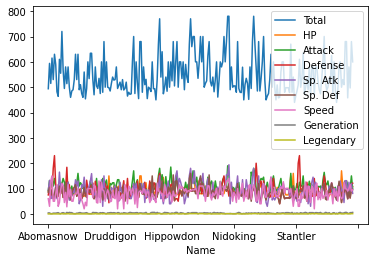

In [56]:
type_aboveavg = df_mvreplace[
    (df_mvreplace['HP'] > 69.25875) &
    (df_mvreplace['Total'] > 435.10250) &
    (df_mvreplace['Attack'] > 79.00125)
].groupby('Name').sum().plot()

This is the plot for Type 1 which 'HP', 'Total', and 'Attack' are above the average

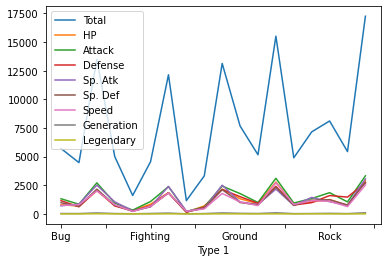

In [53]:
type1_aboveavg = df_mvreplace[
    (df_mvreplace['HP'] > 69.25875) &
    (df_mvreplace['Total'] > 435.10250) &
    (df_mvreplace['Attack'] > 79.00125)
].groupby('Type 1').sum().plot()

Type 1 done. We're moving to the type 2

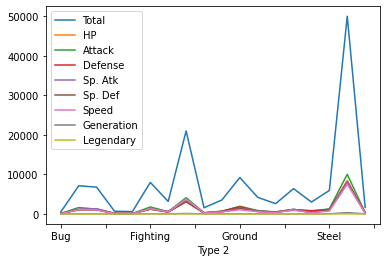

In [54]:
type2_aboveavg = df_mvreplace[
    (df_mvreplace['HP'] > 69.25875) &
    (df_mvreplace['Total'] > 435.10250) &
    (df_mvreplace['Attack'] > 79.00125)
].groupby('Type 2').sum().plot()

We're going to try switching it to bar chart. Just for the type 1 type 2 though. The all type bar-chart get too confusing because of the name are too much.

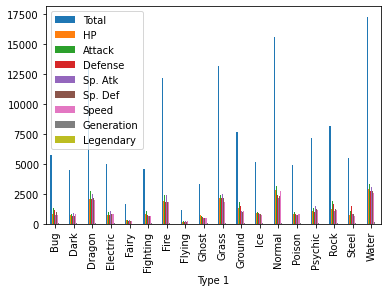

In [67]:
type1_aboveavg = df_mvreplace[
    (df_mvreplace['HP'] > 69.25875) &
    (df_mvreplace['Total'] > 435.10250) &
    (df_mvreplace['Attack'] > 79.00125)
].groupby('Type 1').sum().plot(kind="bar")

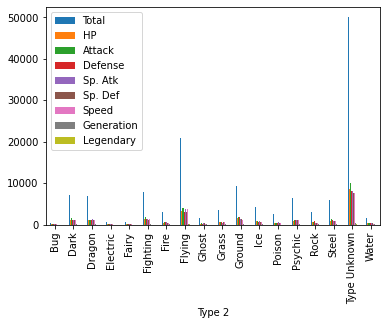

In [66]:
type2_aboveavg = df_mvreplace[
    (df_mvreplace['HP'] > 69.25875) &
    (df_mvreplace['Total'] > 435.10250) &
    (df_mvreplace['Attack'] > 79.00125)
].groupby('Type 2').sum().plot(kind="bar")

### Overall Analysis

1. Dari cleaning data pertama, diketahui ada beberapa pokemon di Type 2 yang merupakan missing values (sudah ditangani dengan diberikan 'Type Unidentified'). Hal ini perlu di *highlight* karena adanya missing values pada jenis Type 2 dari pokemon dapat memperbesar error pada pengolahan data selanjutnya.
2. Dari querying, grouping dan plotting data dapat dilihat adanya perbedaan cukup signfikan antara pokemon Type 1 dan Type 2 yang HP, Attack, serta Totalnya diatas average.
3. Untuk Type 1, dari masing-masing Type Pokemon (Bug, Fighting, Ground, Rock), HP, Attack, dan Total yang diatas avg masih terlihat cukup rata. Semua tipe memiliki distribusi yang nyaris menyerupai distribusi normal.
4. Untuk Type 2, dari masing-masing tipe pokemon (Bug, Fighting, Ground, Steel (Evolusi dari Rock adalah Steel)) bisa dilihat pada Steel, jauh diatas yangt tiga kategori lainnya. Sehingga pokemon-pokemon yang evolusi tipe 2 nya menjadi Steel akan mendapatkan Hp, Attack, dan Total yang sangat tinggi.